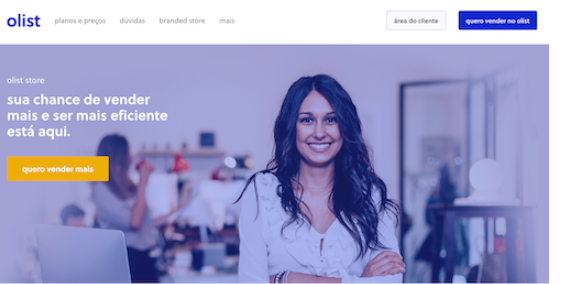

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import datetime
from datetime import date, timedelta
from sklearn.decomposition import PCA
import pca
from pca import pca
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('olist_cluster_analysis.csv')

# Time Clusters Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91074 entries, 0 to 91073
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_unique_id                       91074 non-null  object 
 1   order_approved_at                        91074 non-null  object 
 2   temps_session                            91074 non-null  float64
 3   experience_client                        91074 non-null  float64
 4   temps_livraison_estime                   91074 non-null  float64
 5   review_classification                    91074 non-null  float64
 6   temps_de_reponse                         91074 non-null  float64
 7   longueur_comment_message                 91074 non-null  float64
 8   bed_bath_table                           91074 non-null  float64
 9   health_beauty                            91074 non-null  float64
 10  sports_leisure                           91074

In [4]:
# To datetime au lieu d'object
df.order_approved_at  = pd.to_datetime(df.order_approved_at)

In [5]:
df['Month'] = df['order_approved_at'].dt.to_period('M')

In [6]:
df

,customer_unique_id,order_approved_at,temps_session,experience_client,temps_livraison_estime,review_classification,temps_de_reponse,longueur_comment_message,bed_bath_table,health_beauty,...,fashion_shoes,industry_commerce_and_business,books_technical,recency,frequency,monetary_value,rfm_segment,Kmeans_cluster,CAH_cluster,Month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,891.0,553930.0,910122.0,3.0,4.572778,111.0,141.9,0.00,...,0.0,0.0,0.0,234,1.0,141.90,Meileurs clients,3,0,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,26057.0,283875.0,624856.0,2.0,0.937095,1.0,0.0,27.19,...,0.0,0.0,0.0,237,1.0,27.19,Clients occasionnels à petit budget,3,0,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,0.0,2223224.0,2343297.0,2.0,1.055370,1.0,0.0,0.00,...,0.0,0.0,0.0,660,1.0,86.22,Clients anciens petit budget,2,1,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,1176.0,1731204.0,2689843.0,2.0,1.012396,12.0,0.0,0.00,...,0.0,0.0,0.0,444,1.0,43.62,Clients occasionnels à petit budget,2,2,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,1270.0,1135394.0,1741988.0,3.0,4.937211,1.0,0.0,0.00,...,0.0,0.0,0.0,411,1.0,196.89,Clients occasionnels à gros budget,1,1,2017-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91069,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,880.0,2377284.0,4675484.0,3.0,4.472280,1.0,0.0,4134.84,...,0.0,0.0,0.0,570,2.0,4134.84,Clients occasionnels à gros budget,0,2,2017-06
91070,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,504.0,2600424.0,2778220.0,2.0,5.494433,1.0,0.0,0.00,...,0.0,0.0,0.0,385,1.0,84.58,Clients occasionnels à petit budget,2,1,2017-12
91071,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,808.0,1284948.0,3830236.0,3.0,2.627326,1.0,0.0,0.00,...,0.0,0.0,0.0,691,1.0,112.46,Clients anciens petit budget,1,1,2017-02
91072,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47,2466.0,1024605.0,2188873.0,3.0,2.636343,133.0,0.0,0.00,...,0.0,0.0,0.0,242,1.0,133.69,Clients occasionnels à gros budget,1,0,2018-05


## RFM

In [7]:
df_rfm = df.groupby(['Month', 'rfm_segment']).size().unstack().fillna(0).reset_index()

In [8]:
df_rfm['Month'] = df_rfm['Month'].astype('str')

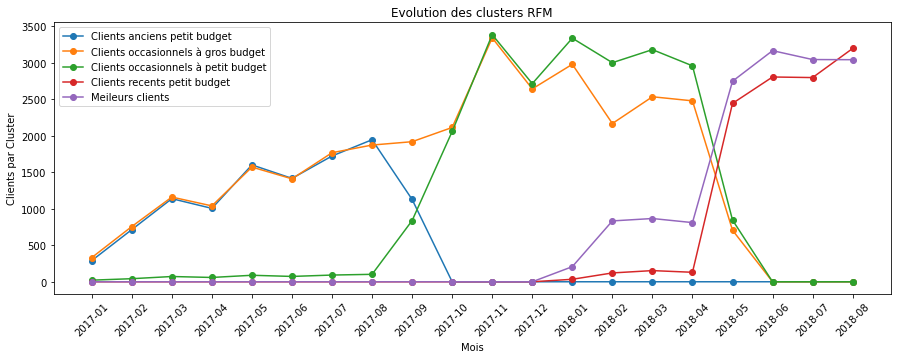

In [9]:
fig = plt.figure(figsize=(15,5))
ax = plt.gca()

for col in df_rfm.columns:
    if col != 'Month':
        ax.plot(df_rfm['Month'], df_rfm[col], marker='o', label=col)

plt.xlabel('Mois')
plt.xticks(rotation=45)
plt.ylabel('Clients par Cluster')
plt.title('Evolution des clusters RFM')
plt.legend()
plt.show()

## Kmeans

In [10]:
df_kmeans = df.groupby(['Month', 'Kmeans_cluster']).size().unstack().fillna(0).reset_index()

In [11]:
df_kmeans

Kmeans_cluster,Month,0,1,2,3
0,2017-01,115,249,271,8
1,2017-02,203,602,651,58
2,2017-03,327,869,1001,175
3,2017-04,274,852,890,89
4,2017-05,437,1180,1245,401
5,2017-06,357,1089,1107,348
6,2017-07,410,1344,1317,514
7,2017-08,536,1332,1391,664
8,2017-09,577,1382,1351,577
9,2017-10,612,1521,1375,667


In [12]:
df_kmeans['Month'] = df_kmeans['Month'].astype('str')

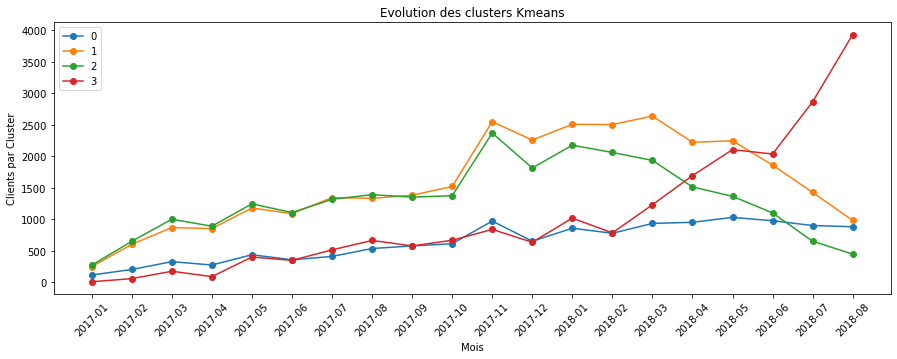

In [13]:
fig = plt.figure(figsize=(15,5))
ax = plt.gca()

for col in df_kmeans.columns:
    if col != 'Month':
        ax.plot(df_kmeans['Month'], df_kmeans[col], marker='o', label=col)

plt.xlabel('Mois')
plt.xticks(rotation=45)
plt.ylabel('Clients par Cluster')
plt.title('Evolution des clusters Kmeans')
plt.legend()
plt.show()

## CAH

In [14]:
df_CAH = df.groupby(['Month', 'CAH_cluster']).size().unstack().fillna(0).reset_index()

In [15]:
df_CAH 

CAH_cluster,Month,0,1,2,3
0,2017-01,247,191,111,94
1,2017-02,607,382,271,254
2,2017-03,909,655,473,335
3,2017-04,857,546,358,344
4,2017-05,1236,867,666,494
5,2017-06,1150,764,570,417
6,2017-07,1404,903,751,527
7,2017-08,1489,1005,816,613
8,2017-09,1523,980,782,602
9,2017-10,1600,1063,810,702


In [16]:
df_CAH['Month'] = df_CAH['Month'].astype('str')

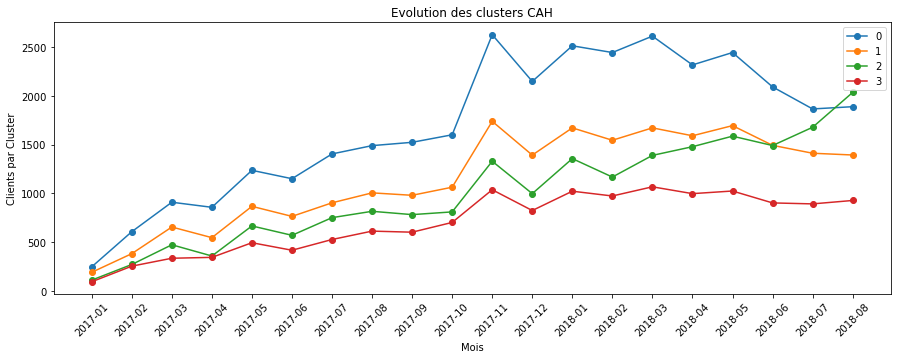

In [17]:
fig = plt.figure(figsize=(15,5))
ax = plt.gca()

for col in df_CAH.columns:
    if col != 'Month':
        ax.plot(df_CAH['Month'], df_CAH[col], marker='o', label=col)

plt.xlabel('Mois')
plt.xticks(rotation=45)
plt.ylabel('Clients par Cluster')
plt.title('Evolution des clusters CAH')
plt.legend()
plt.show()

# Maintenance Clusers Kmeans

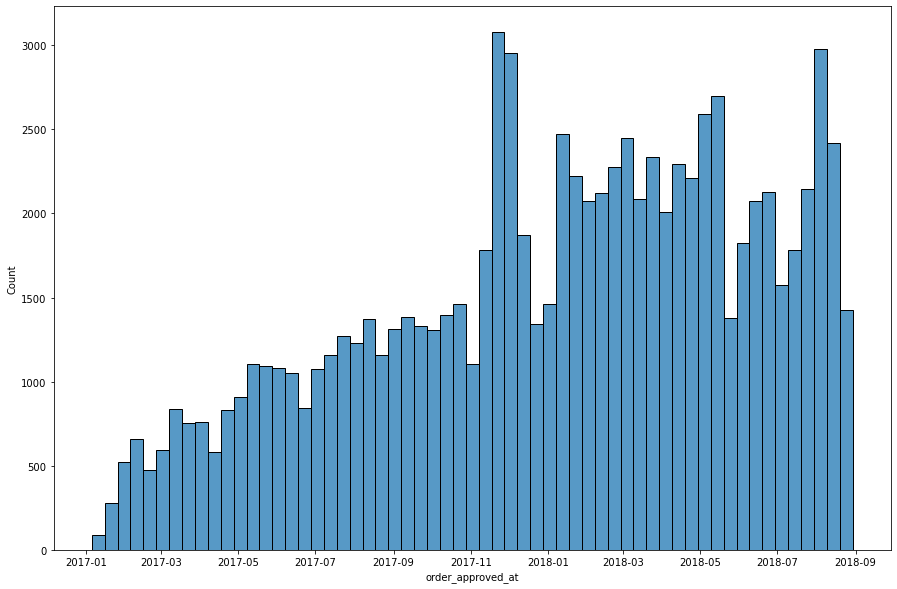

In [18]:
plt.figure(figsize=(15,10))
sns.histplot(df['order_approved_at']);

In [19]:
from sklearn.metrics.cluster import adjusted_rand_score

In [20]:
features = ['recency', 'frequency', 'monetary_value', 'temps_session',
            'experience_client', 'temps_livraison_estime',
            'review_classification', 'longueur_comment_message', 'temps_de_reponse']
# Separating out the features
df_ = df[features]

In [21]:
df_maintenance = df_.copy()

In [22]:
data_test_4_mois =  df_maintenance.loc[(df_maintenance["recency"] > 610) & (df_maintenance["recency"] < 730)]
customers_stability = df_.drop(index=data_test_4_mois.index)

## Creation du model avec 4 mois de 2017

In [23]:
k = 4

In [24]:
stability = {}

# Séparer les caractéristiques
x = customers_stability.loc[:, features].values

# convert x to a Pandas data frame
df_test = pd.DataFrame(x)

# apply log(x+1) element-wise to a subset of columns
X = df_test.applymap(lambda x: np.log(x+1))

# Effectuer une PCA avec 4 composants
pca = PCA(n_components=4)
Principal_components = pca.fit_transform(X)

# Effectuer un KMeans avec k clusters
kmeans_model_4mois = KMeans(n_clusters=k, random_state=0)

# Entraîner le modèle sur les données
model_4mois = kmeans_model_4mois.fit(Principal_components)

# Prédire les labels des données
labels_4mois = model_4mois.labels_

# Ajouter les labels au dictionnaire stability
stability = pd.DataFrame({"label_4mois": labels_4mois},
                         index=customers_stability.index)
stability.head(3)

,label_4mois
0,3
1,0
3,3


In [25]:
customers_stability.shape

(84571, 9)

### Comparaison du model 4 mois avec les données sur 1 an

In [26]:
day = range(365, 730, 120)
label_predict = []
for d in day:
    # Sélectionner les données dont la récence est inférieure à d
    df_filtered = customers_stability[customers_stability['recency'] > d]
    print(len(df_filtered))

    if len(df_filtered) > 0:
        # Séparer les caractéristiques
        x = df_filtered.loc[:, features].values

        # convert x to a Pandas data frame
        df_test = pd.DataFrame(x)
        
        # apply log(x+1) element-wise to a subset of columns
        X = df_test.applymap(lambda x: np.log(x+1))

        # Effectuer une PCA avec 4 composants
        pca = PCA(n_components=4)
        Principal_components = pca.fit_transform(X)

        # Prédire les labels des données
        labels = model_4mois.predict(Principal_components)

        # Ajouter le nom de la colonne à la liste des colonnes
        label_predict.append("label_" + str(d) + "d")

        # Ajouter les valeurs prédites à la liste des colonnes
        customers_stability.loc[df_filtered.index, "label_" + str(d) + "d"] = labels

33828
13803
428
0


In [27]:
customers_stability = customers_stability.drop(features, axis=1)

In [28]:
customers_stability=customers_stability.dropna(axis=0)

In [29]:
merged_df_4 = stability.merge(customers_stability, left_index=True, right_index=True)

In [30]:
merged_df_4.shape

(428, 4)

ARI à 0 Mois : 1.0
ARI à 4 Mois : 0.9935214973829704
ARI à 8 Mois : 0.9935214973829704
ARI à 12 Mois : 0.9806750681667425


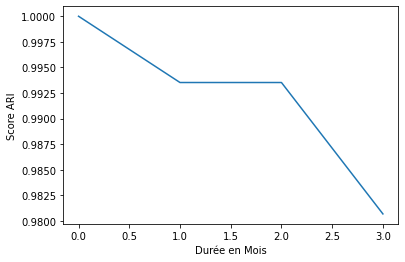

In [31]:
ari_score_4_mois = []
i=-4
for label in merged_df_4.columns:
    i+=4
    score = adjusted_rand_score(
        merged_df_4['label_4mois'],merged_df_4[label])
    print(f"ARI à {i} Mois : {score}")
    ari_score_4_mois.append(score)
    months = [0, 4, 8, 12]

df_ari_4 = pd.DataFrame({"Months": months , "ARI Scores 4 mois": ari_score_4_mois})
plt.plot(ari_score_4_mois)
plt.xlabel('Durée en Mois')
plt.ylabel('Score ARI')
plt.show()

In [32]:
df_ari_4

,Months,ARI Scores 4 mois
0,0,1.000000
1,4,0.993521
2,8,0.993521
3,12,0.980675


### Graphique Sankey

In [33]:
merged_df_4 = merged_df_4.merge(df[features], left_index=True, right_index=True)

In [34]:
import plotly.graph_objects as go

In [35]:
# Créer un dictionnaire de couleurs pour chaque valeur source
colorDict = {'0': 'blue', '1': 'green', '2': 'purple', '3': 'orange'}

# Grouper les données par source et cible et agréger les mesures de récence, de monétaire et de fréquence
grouped_df = merged_df_4.groupby(['label_4mois', 'label_605d']).agg('mean').reset_index()


In [36]:
grouped_df

,label_4mois,label_605d,label_365d,label_485d,recency,frequency,monetary_value,temps_session,experience_client,temps_livraison_estime,review_classification,longueur_comment_message,temps_de_reponse
0,0,0.0,0.000000,0.000000,606.974138,1.310345,229.369828,161567.642241,1.302103e+06,2.267712e+06,2.594828,1.206897,4.924684
1,1,1.0,1.000000,1.000000,608.005525,1.132597,134.381657,952.720074,1.156307e+06,2.385627e+06,2.540516,1.099448,3.388683
2,1,3.0,1.666667,1.666667,609.000000,1.000000,114.163333,813.000000,1.262815e+06,2.981390e+06,3.000000,9.333333,2.321979
3,2,2.0,2.000000,2.000000,606.838710,1.145161,205.375484,171217.637097,1.609135e+06,2.364485e+06,2.177419,80.903226,3.216954
4,3,3.0,3.000000,3.000000,607.909091,1.303030,206.899242,920.148990,1.474341e+06,2.450685e+06,2.353535,69.517677,2.865696


In [65]:

# Créer un diagramme Sankey avec les flux agrégés
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=25,
        thickness=20,
        line=dict(color='gray', width=0.5),
        label=['0', '1', '2', '3'],
        color=[colorDict[x] for x in ['0', '1', '2', '3']]
    ),
    link=dict(
        source=grouped_df['label_4mois'],
        target=grouped_df['label_605d'],
        value=grouped_df['review_classification']
    ),
    textfont=dict(color='white', size=11)
)])

# Mettre à jour la disposition du diagramme
fig.update_layout(
    title='Diagramme Sankey',
    font=dict(size=12)
)

# Afficher le diagramme
fig.show()

## Création du model avec 3 mois 

In [38]:
data_test_3_mois =  df_maintenance.loc[(df_maintenance["recency"] > 640) & (df_maintenance["recency"] < 730)]
customers_stability = df_.drop(index=data_test_3_mois.index)

In [39]:
stability = {}

# Séparer les caractéristiques
x = customers_stability.loc[:, features].values

# convert x to a Pandas data frame
df_test = pd.DataFrame(x)

# apply log(x+1) element-wise to a subset of columns
X = df_test.applymap(lambda x: np.log(x+1))

# Effectuer une PCA avec 4 composants
pca = PCA(n_components=4)
Principal_components = pca.fit_transform(X)

# Effectuer un KMeans avec k clusters
kmeans_model_3mois = KMeans(n_clusters=k, random_state=0)

# Entraîner le modèle sur les données
model_3mois = kmeans_model_3mois.fit(Principal_components)

# Prédire les labels des données
labels_3mois = model_3mois.labels_

# Ajouter les labels au dictionnaire stability
stability = pd.DataFrame({"label_3mois" : labels_3mois},
                         index=customers_stability.index)
stability.head(3)

,label_3mois
0,2
1,1
3,2


### Comparaison du model 3 mois avec les données sur 1 an

In [40]:
day = range(365, 730, 90)
label_predict = []
for d in day:
    # Sélectionner les données dont la récence est inférieure à d
    df_filtered = customers_stability[customers_stability['recency'] > d]
    print(len(df_filtered))

    if len(df_filtered) > 0:
        # Séparer les caractéristiques
        x = df_filtered.loc[:, features].values

        # convert x to a Pandas data frame
        df_test = pd.DataFrame(x)
        
        # apply log(x+1) element-wise to a subset of columns
        X = df_test.applymap(lambda x: np.log(x+1))

        # Effectuer une PCA avec 4 composants
        pca = PCA(n_components=4)
        Principal_components = pca.fit_transform(X)

        # Prédire les labels des données
        labels = model_3mois.predict(Principal_components)

        # Ajouter le nom de la colonne à la liste des colonnes
        label_predict.append("label_" + str(d) + "d")

        # Ajouter les valeurs prédites à la liste des colonnes
        customers_stability.loc[df_filtered.index, "label_" + str(d) + "d"] = labels

35942
19804
8574
283
0


In [41]:
customers_stability = customers_stability.drop(features, axis=1)

In [42]:
customers_stability=customers_stability.dropna(axis=0)

In [43]:
merged_df_3 = stability.merge(customers_stability, left_index=True, right_index=True)

In [44]:
merged_df_3.shape

(283, 5)

ARI à 0 Mois : 1.0
ARI à 3 Mois : 1.0
ARI à 6 Mois : 1.0
ARI à 9 Mois : 0.975119560610536
ARI à 12 Mois : 0.8438732318552353


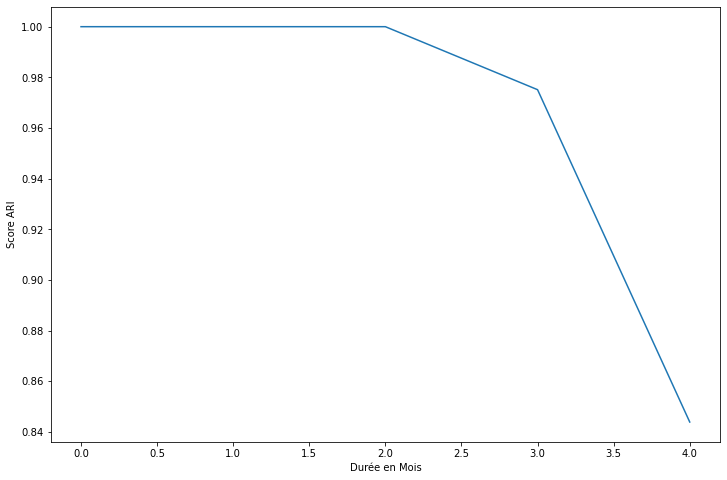

In [45]:
ari_score_3_mois = []
i=-3
for label in merged_df_3.columns:
    i+=3
    score = adjusted_rand_score(
        merged_df_3['label_3mois'],merged_df_3[label])
    print(f"ARI à {i} Mois : {score}")
    ari_score_3_mois.append(score)
    months = [0, 3, 6, 9, 12]

df_ari_3 = pd.DataFrame({"Months": months, "ARI Scores 3 mois": ari_score_3_mois})
plt.figure(figsize=(12,8))
plt.plot(ari_score_3_mois)
plt.xlabel('Durée en Mois')
plt.ylabel('Score ARI')
plt.show()

### Graphique Sankey

In [66]:
merged_df_3 = merged_df_3.merge(df[features], left_index=True, right_index=True)

In [77]:
merged_df_3

,label_3mois,label_365d,label_455d,label_545d,label_635d,recency,frequency,monetary_value,temps_session,experience_client,temps_livraison_estime,review_classification,longueur_comment_message,temps_de_reponse
126,2,2.0,2.0,2.0,2.0,638,1.0,127.98,605.0,792903.0,1937383.0,3.0,41.0,7.581759
619,2,2.0,2.0,2.0,2.0,640,1.0,53.95,900.0,400962.0,1646990.0,3.0,53.0,1.532731
766,0,0.0,0.0,0.0,0.0,636,1.0,50.95,670.0,1352047.0,2597382.0,3.0,1.0,1.119016
889,2,2.0,2.0,2.0,2.0,637,1.0,133.95,720.0,453361.0,1839449.0,3.0,67.0,2.695278
993,0,0.0,0.0,0.0,0.0,636,1.0,121.80,499.0,1276850.0,3128088.0,3.0,1.0,0.878912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89957,0,0.0,0.0,0.0,0.0,638,1.0,91.94,657.0,453810.0,2020182.0,3.0,1.0,0.516053
90329,2,2.0,2.0,2.0,2.0,638,1.0,62.97,691.0,421449.0,2791789.0,2.0,18.0,1.462766
90553,0,0.0,0.0,0.0,0.0,636,1.0,162.13,808.0,2157634.0,3316493.0,2.0,2.0,1.052002
91031,2,2.0,2.0,2.0,2.0,637,2.0,80.12,534.0,1498784.0,2747856.0,2.0,36.0,0.886725


In [73]:
# Créer un dictionnaire de couleurs pour chaque valeur source
colorDict = {'0': 'blue', '1': 'green', '2': 'purple', '3': 'orange'}

# Grouper les données par source et cible et agréger les mesures de récence, de monétaire et de fréquence
grouped_df = merged_df_3.groupby(['label_3mois', 'label_365d']).agg('mean').reset_index()
grouped_df

,label_3mois,label_635d,label_365d,label_455d,label_545d,recency,frequency,monetary_value,temps_session,experience_client,temps_livraison_estime,review_classification,longueur_comment_message,temps_de_reponse
0,0,0.0,0.0,0.0,0.000000,637.932773,1.243697,156.817395,800.816527,1.027272e+06,2.372926e+06,2.689076,1.478992,5.279269
1,0,1.0,0.0,0.0,0.000000,637.800000,1.000000,91.408000,4759.400000,7.799510e+05,2.510339e+06,2.800000,1.000000,1.505461
2,1,1.0,1.0,1.0,1.000000,638.722222,1.138889,460.483056,101793.388889,1.352055e+06,2.078823e+06,2.611111,1.000000,2.642105
3,1,3.0,1.0,1.0,1.000000,638.500000,1.000000,1195.945000,93991.500000,1.473554e+06,2.332932e+06,3.000000,8.500000,3.087193
4,2,0.0,2.0,2.0,1.555556,638.222222,1.111111,112.774444,747.000000,3.117283e+06,2.850989e+06,2.666667,12.333333,3.463835
5,2,2.0,2.0,2.0,2.000000,638.304348,1.260870,279.717065,958.336957,1.207557e+06,2.467719e+06,2.288043,81.945652,3.572199
6,3,3.0,3.0,3.0,3.000000,639.100000,1.150000,259.534000,172082.800000,1.353244e+06,2.052406e+06,2.200000,71.050000,2.179084


In [72]:

# Créer un diagramme Sankey avec les flux agrégés
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=25,
        thickness=20,
        line=dict(color='gray', width=0.5),
        label=['0', '1', '2', '3'],
        color=[colorDict[x] for x in ['0', '1', '2', '3']]
    ),
    link=dict(
        source=grouped_df['label_3mois'],
        target=grouped_df['label_365d'],
        value=grouped_df['review_classification']
    ),
    textfont=dict(color='white', size=11)
)])

# Mettre à jour la disposition du diagramme
fig.update_layout(
    title='Diagramme Sankey',
    font=dict(size=12)
)

# Afficher le diagramme
fig.show()

## Création d'un model avec 2 mois 

In [46]:
data_test_2_mois =  df_maintenance.loc[(df_maintenance["recency"] > 670) & (df_maintenance["recency"] < 730)]
customers_stability = df_.drop(index=data_test_2_mois.index)

In [47]:
stability = {}

# Séparer les caractéristiques
x = customers_stability.loc[:, features].values

# convert x to a Pandas data frame
df_test = pd.DataFrame(x)

# apply log(x+1) element-wise to a subset of columns
X = df_test.applymap(lambda x: np.log(x+1))

# Effectuer une PCA avec 4 composants
pca = PCA(n_components=4)
Principal_components = pca.fit_transform(X)

# Effectuer un KMeans avec k clusters
kmeans_model_2mois = KMeans(n_clusters=k, random_state=0)

# Entraîner le modèle sur les données
model_2mois = kmeans_model_2mois.fit(Principal_components)

# Prédire les labels des données
labels_2mois = model_2mois.labels_

# Ajouter les labels au dictionnaire stability
stability = pd.DataFrame({"label_2mois" : labels_2mois},
                         index=customers_stability.index)
stability.head(3)

,label_2mois
0,2
1,1
2,0


### Comparaison du model 2 mois avec les données sur 1 an

In [48]:
day = range(365, 730, 60)
label_predict = []
for d in day:
    # Sélectionner les données dont la récence est inférieure à d
    df_filtered = customers_stability[customers_stability['recency'] > d]
    print(len(df_filtered))

    if len(df_filtered) > 0:
        # Séparer les caractéristiques
        x = df_filtered.loc[:, features].values

        # convert x to a Pandas data frame
        df_test = pd.DataFrame(x)
        
        # apply log(x+1) element-wise to a subset of columns
        X = df_test.applymap(lambda x: np.log(x+1))

        # Effectuer une PCA avec 4 composants
        pca = PCA(n_components=4)
        Principal_components = pca.fit_transform(X)

        # Prédire les labels des données
        labels = model_2mois.predict(Principal_components)

        # Ajouter le nom de la colonne à la liste des colonnes
        label_predict.append("label_" + str(d) + "d")

        # Ajouter les valeurs prédites à la liste des colonnes
        customers_stability.loc[df_filtered.index, "label_" + str(d) + "d"] = labels

38217
26092
18192
10849
4817
322
0


In [49]:
customers_stability = customers_stability.drop(features, axis=1)

In [50]:
customers_stability=customers_stability.dropna(axis=0)

In [51]:
merged_df_2 = stability.merge(customers_stability, left_index=True, right_index=True)

In [52]:
merged_df_2.shape

(322, 7)

ARI à 0 Mois : 1.0
ARI à 2 Mois : 0.9906823946898318
ARI à 4 Mois : 0.9469137502637137
ARI à 6 Mois : 0.9416797025556778
ARI à 8 Mois : 0.9146297601534596
ARI à 10 Mois : 0.5413152772817988
ARI à 12 Mois : 0.8459022991295809


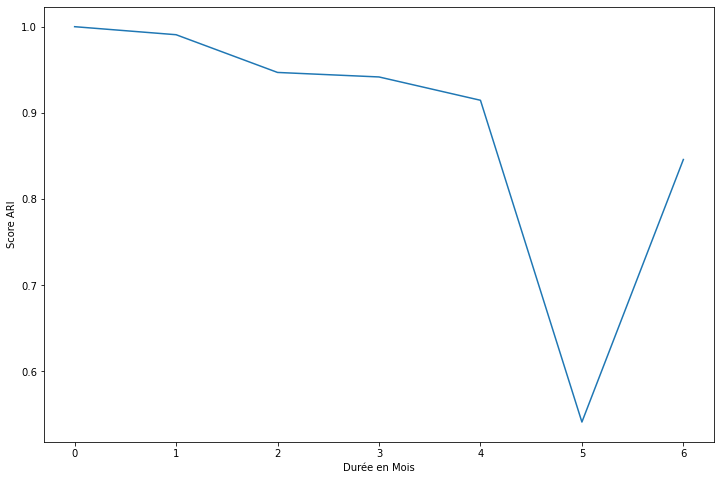

In [53]:
ari_score_2_mois = []
i = -2
for label in merged_df_2.columns:
    i += 2
    score = adjusted_rand_score(
        merged_df_2['label_2mois'], merged_df_2[label])
    print(f"ARI à {i} Mois : {score}")
    ari_score_2_mois.append(score)
    months = [0, 2, 4, 6, 8, 10, 12]

df_ari_2 = pd.DataFrame(
    {"Months": months, "ARI Scores 2 mois": ari_score_2_mois})
plt.figure(figsize=(12,8))
plt.plot(ari_score_2_mois)
plt.xlabel('Durée en Mois')
plt.ylabel('Score ARI')
plt.show()

### Graphique Sankey

In [75]:
merged_df_2 = merged_df_2.merge(df[features], left_index=True, right_index=True)

In [76]:
merged_df_2

,label_2mois,label_365d,label_425d,label_485d,label_545d,label_605d,label_665d,recency,frequency,monetary_value,temps_session,experience_client,temps_livraison_estime,review_classification,longueur_comment_message,temps_de_reponse
8,0,0.0,0.0,0.0,0.0,0.0,1.0,666,1.0,150.12,674.0,378056.0,2765794.0,2.0,1.0,6.156933
130,3,3.0,3.0,3.0,3.0,2.0,2.0,666,1.0,364.75,53776.0,1121015.0,2913287.0,3.0,17.0,4.532685
236,1,1.0,1.0,1.0,1.0,0.0,0.0,667,1.0,66.99,151112.0,1238156.0,1805368.0,2.0,1.0,7.061551
352,2,2.0,2.0,2.0,2.0,2.0,3.0,666,2.0,746.44,667.0,744462.0,2075225.0,3.0,11.0,2.470174
421,0,0.0,0.0,0.0,0.0,0.0,1.0,669,1.0,117.53,1055.0,1055451.0,1943375.0,3.0,1.0,3.035787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89515,2,2.0,3.0,3.0,3.0,2.0,2.0,670,1.0,79.78,5984.0,844081.0,1831216.0,3.0,30.0,1.519606
89562,1,1.0,1.0,1.0,1.0,0.0,0.0,667,1.0,45.74,464429.0,1347121.0,2670569.0,3.0,1.0,0.981690
89691,1,1.0,1.0,1.0,1.0,0.0,0.0,668,1.0,30.95,19887.0,540734.0,1539886.0,2.0,5.0,2.866979
89853,0,0.0,0.0,0.0,0.0,0.0,1.0,669,2.0,557.12,586.0,989549.0,2426682.0,2.0,1.0,1.115139


In [79]:
# Créer un dictionnaire de couleurs pour chaque valeur source
colorDict = {'0': 'blue', '1': 'green', '2': 'purple', '3': 'orange'}

# Grouper les données par source et cible et agréger les mesures de récence, de monétaire et de fréquence
grouped_df = merged_df_2.groupby(['label_2mois', 'label_365d']).agg('mean').reset_index()
grouped_df

,label_2mois,label_365d,label_425d,label_485d,label_545d,label_605d,label_665d,recency,frequency,monetary_value,temps_session,experience_client,temps_livraison_estime,review_classification,longueur_comment_message,temps_de_reponse
0,0,0.0,0.021739,0.021739,0.043478,0.000000,0.920290,667.826087,1.260870,188.531449,999.800725,1.010493e+06,2.065376e+06,2.507246,1.427536,6.414792
1,0,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,670.000000,1.000000,211.910000,7715.000000,6.686160e+05,1.658461e+06,3.000000,1.000000,4.824549
2,1,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,667.578125,1.156250,211.523125,131711.796875,1.102418e+06,1.892685e+06,2.515625,1.531250,2.721501
3,2,2.0,2.037500,2.050000,2.050000,2.000000,2.912500,667.950000,1.350000,302.123375,1033.975000,1.003512e+06,2.067975e+06,2.281250,71.375000,3.561977
4,3,3.0,3.000000,3.000000,3.000000,1.948718,1.897436,667.692308,1.358974,218.872051,164931.212821,1.682427e+06,2.072172e+06,2.115385,66.698718,2.695499


In [80]:
# Créer un diagramme Sankey avec les flux agrégés
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=25,
        thickness=20,
        line=dict(color='gray', width=0.5),
        label=['0', '1', '2', '3'],
        color=[colorDict[x] for x in ['0', '1', '2', '3']]
    ),
    link=dict(
        source=grouped_df['label_2mois'],
        target=grouped_df['label_365d'],
        value=grouped_df['review_classification']
    ),
    textfont=dict(color='white', size=11)
)])

# Mettre à jour la disposition du diagramme
fig.update_layout(
    title='Diagramme Sankey',
    font=dict(size=12)
)

# Afficher le diagramme
fig.show()

## Création d'un model avec 1 mois 

In [54]:
data_test_1_mois =  df_maintenance.loc[(df_maintenance["recency"] > 700) & (df_maintenance["recency"] < 730)]
customers_stability = df_.drop(index=data_test_1_mois.index)

In [55]:
stability = {}

# Séparer les caractéristiques
x = customers_stability.loc[:, features].values

# convert x to a Pandas data frame
df_test = pd.DataFrame(x)

# apply log(x+1) element-wise to a subset of columns
X = df_test.applymap(lambda x: np.log(x+1))

# Effectuer une PCA avec 4 composants
pca = PCA(n_components=4)
Principal_components = pca.fit_transform(X)

# Effectuer un KMeans avec k clusters
kmeans_model_1mois = KMeans(n_clusters=k, random_state=0)

# Entraîner le modèle sur les données
model_1mois = kmeans_model_1mois.fit(Principal_components)

# Prédire les labels des données
labels_1mois = model_1mois.labels_

# Ajouter les labels au dictionnaire stability
stability = pd.DataFrame({"label_1mois" : labels_1mois},
                         index=customers_stability.index)
stability.head(3)

,label_1mois
0,2
1,1
2,0


### Comparaison du model 1 mois avec les données sur 1 an

In [56]:
day = range(365, 730, 30)
label_predict = []
for d in day:
    # Sélectionner les données dont la récence est inférieure à d
    df_filtered = customers_stability[customers_stability['recency'] > d]
    print(len(df_filtered))

    if len(df_filtered) > 0:
        # Séparer les caractéristiques
        x = df_filtered.loc[:, features].values

        # convert x to a Pandas data frame
        df_test = pd.DataFrame(x)
        
        # apply log(x+1) element-wise to a subset of columns
        X = df_test.applymap(lambda x: np.log(x+1))

        # Effectuer une PCA avec 4 composants
        pca = PCA(n_components=4)
        Principal_components = pca.fit_transform(X)

        # Prédire les labels des données
        labels = model_1mois.predict(Principal_components)

        # Ajouter le nom de la colonne à la liste des colonnes
        label_predict.append("label_" + str(d) + "d")

        # Ajouter les valeurs prédites à la liste des colonnes
        customers_stability.loc[df_filtered.index, "label_" + str(d) + "d"] = labels

39806
34359
27681
23668
19781
15980
12438
9591
6406
4147
1911
247
0


In [57]:
customers_stability = customers_stability.drop(features, axis=1)

In [58]:
customers_stability=customers_stability.dropna(axis=0)

In [59]:
merged_df_1 = stability.merge(customers_stability, left_index=True, right_index=True)

ARI à 0 Mois : 1.0
ARI à 1 Mois : 0.9880144721687497
ARI à 2 Mois : 0.9644017178641927
ARI à 3 Mois : 0.9527797828176282
ARI à 4 Mois : 0.9341907746214361
ARI à 5 Mois : 0.9289026306050694
ARI à 6 Mois : 0.9115389977526113
ARI à 7 Mois : 0.8140620893111031
ARI à 8 Mois : 0.7420238198152668
ARI à 9 Mois : 0.5617193653651401
ARI à 10 Mois : 0.5617193653651401
ARI à 11 Mois : 0.5647199165029849
ARI à 12 Mois : 0.5925700425436145


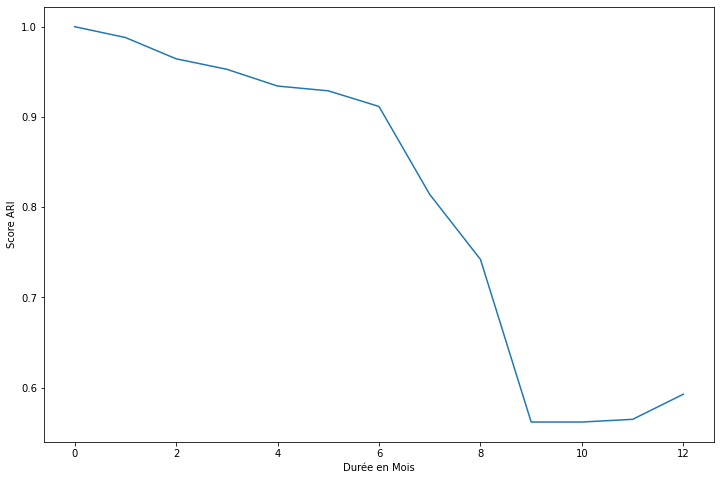

In [60]:
ari_score_1_mois = []
i=-1
for label in merged_df_1.columns:
    i+=1
    score = adjusted_rand_score(
        merged_df_1['label_1mois'],merged_df_1[label])
    print(f"ARI à {i} Mois : {score}")
    ari_score_1_mois.append(score)
    months = range(0, len(ari_score_1_mois))

df_ari_1 = pd.DataFrame({"Months": months, "ARI Scores 1 mois": ari_score_1_mois})
plt.figure(figsize=(12,8))
plt.plot(ari_score_1_mois)
plt.xlabel('Durée en Mois')
plt.ylabel('Score ARI')
plt.show()

In [61]:
df_ari_4

,Months,ARI Scores 4 mois
0,0,1.000000
1,4,0.993521
2,8,0.993521
3,12,0.980675


### Graphique Sankey

In [81]:
merged_df_1 = merged_df_1.merge(df[features], left_index=True, right_index=True)

In [82]:
merged_df_1

,label_1mois,label_365d,label_395d,label_425d,label_455d,label_485d,label_515d,label_545d,label_575d,label_605d,...,label_695d,recency,frequency,monetary_value,temps_session,experience_client,temps_livraison_estime,review_classification,longueur_comment_message,temps_de_reponse
59,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,697,1.0,64.42,720.0,761977.0,3146084.0,1.0,21.0,0.417257
436,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,700,1.0,105.74,865.0,833868.0,4249674.0,2.0,200.0,0.936701
1404,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,699,1.0,77.99,2806.0,675385.0,3929164.0,3.0,1.0,1.661042
1445,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,697,1.0,84.99,90026.0,708162.0,4627681.0,2.0,1.0,1.153125
1833,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,2.0,698,1.0,399.99,176009.0,1104068.0,4749918.0,2.0,144.0,3.056898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88472,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,698,1.0,81.78,844.0,1265076.0,2942083.0,3.0,1.0,2.975752
89434,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,2.0,696,3.0,1179.45,130002.0,1207775.0,3014077.0,3.0,36.0,71.589618
89476,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,697,2.0,100.64,820.0,2495547.0,5913886.0,2.0,1.0,0.982870
90319,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,696,1.0,141.23,764.0,1032229.0,3311921.0,3.0,1.0,1.529144


In [84]:
# Créer un dictionnaire de couleurs pour chaque valeur source
colorDict = {'0': 'blue', '1': 'green', '2': 'purple', '3': 'orange'}

# Grouper les données par source et cible et agréger les mesures de récence, de monétaire et de fréquence
grouped_df = merged_df_1.groupby(['label_1mois', 'label_365d']).agg('mean').reset_index()
grouped_df

,label_1mois,label_365d,label_395d,label_425d,label_455d,label_485d,label_515d,label_545d,label_575d,label_605d,...,label_695d,recency,frequency,monetary_value,temps_session,experience_client,temps_livraison_estime,review_classification,longueur_comment_message,temps_de_reponse
0,0,0.0,0.019231,0.028846,0.038462,0.038462,0.057692,0.115385,0.153846,0.0,...,0.692308,697.644231,1.384615,330.943558,1576.402244,9.531248e+05,3.222628e+06,2.615385,1.240385,2.226014
1,0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,0.000000,696.000000,1.000000,370.290000,8087.000000,2.316130e+06,3.320982e+06,2.000000,1.000000,0.825822
2,1,1.0,1.000000,1.000000,1.000000,1.039216,1.000000,1.039216,1.039216,0.0,...,0.078431,697.235294,1.411765,297.695490,113483.245098,1.104814e+06,3.522364e+06,2.490196,1.215686,2.626713
3,2,2.0,2.000000,2.000000,2.014286,2.014286,2.014286,2.071429,2.142857,2.0,...,2.828571,697.757143,1.200000,179.058286,1365.250000,1.299542e+06,3.372845e+06,2.271429,70.685714,2.396806
4,3,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.0,...,2.000000,697.285714,1.619048,274.000000,168783.000000,1.150189e+06,3.565319e+06,2.380952,55.761905,5.613687


In [85]:
# Créer un diagramme Sankey avec les flux agrégés
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=25,
        thickness=20,
        line=dict(color='gray', width=0.5),
        label=['0', '1', '2', '3'],
        color=[colorDict[x] for x in ['0', '1', '2', '3']]
    ),
    link=dict(
        source=grouped_df['label_1mois'],
        target=grouped_df['label_365d'],
        value=grouped_df['review_classification']
    ),
    textfont=dict(color='white', size=11)
)])

# Mettre à jour la disposition du diagramme
fig.update_layout(
    title='Diagramme Sankey',
    font=dict(size=12)
)

# Afficher le diagramme
fig.show()

## Conclusion Maintenance

In [62]:
df_ari_1_2 = df_ari_1.merge(df_ari_2, on="Months", how='left')
df_ari_1_2_3 = df_ari_1_2.merge(df_ari_3, on="Months", how='left')
df_ari_1_2_3_4 = df_ari_1_2_3.merge(df_ari_4, on="Months", how='left')

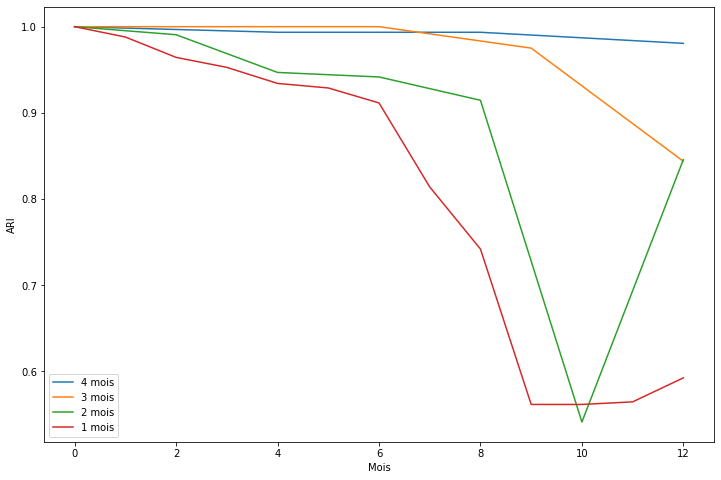

In [63]:
# Affichage du plot
plt.figure(figsize=(12,8))
sns.lineplot(data=df_ari_1_2_3_4["ARI Scores 4 mois"], label='4 mois')
sns.lineplot(data=df_ari_1_2_3_4["ARI Scores 3 mois"], label='3 mois')
sns.lineplot(data=df_ari_1_2_3_4["ARI Scores 2 mois"], label='2 mois')
sns.lineplot(data=df_ari_1_2_3_4["ARI Scores 1 mois"], label='1 mois')

plt.legend()
plt.xlabel('Mois')
plt.ylabel('ARI')
plt.show()